In [79]:
import torch
import os
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from models.resnet_model import get_resnet18
import torch.nn.functional as F

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = get_resnet18()
model.load_state_dict(torch.load("cat_dog_model.pth", map_location=device))
model.eval().to(device)

In [81]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.45, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [82]:
img_path = "test_images/my_dog.png"

img = Image.open(img_path).convert("RGB")
input_tensor = transform(img).unsqueeze(0).to(device)

In [83]:
with torch.no_grad():
    output = model(input_tensor)
    prob = F.softmax(output, dim=1)
    pred = output.argmax(dim=1).item()

In [84]:
classes = ["cat", "dog"]
label = classes[pred]
print(f"Predict: {label}")
print(f"Prob - cat: {prob[0][0]:.2f}, dog: {prob[0][1]:.2f}")

Predict: dog
Prob - cat: 0.23, dog: 0.77


In [85]:
def unnormalize(tensor, mean, std):
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return tensor

unnorm_img = unnormalize(input_tensor[0].cpu(),
                         mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])

unnorm_img = unnorm_img.clamp(0, 1)

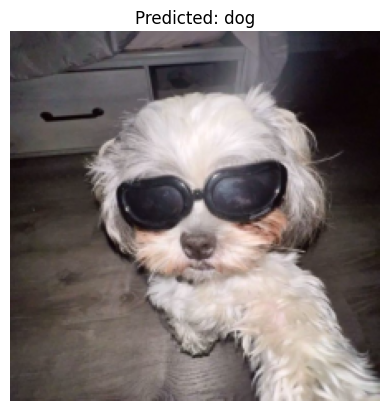

In [86]:
plt.imshow(unnorm_img.permute(1, 2, 0).numpy())
plt.title(f"Predicted: {label}")
plt.axis("off")
plt.show()

In [93]:
predict_dir = "test_images"

for filename in os.listdir(predict_dir):
    if filename.lower().endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(predict_dir, filename)
        image = Image.open(img_path).convert("RGB")
        input_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            prob = F.softmax(output, dim=1)
            pred = output.argmax(dim=1).item()
            label = "cat" if pred == 0 else "dog"

        print(f"{filename}: {label}")
        print(f"Prob - cat: {prob[0][0]:.2f}, dog: {prob[0][1]:.2f}")

glass_cat.jpg: dog
Prob - cat: 0.29, dog: 0.71
gun_cat.jpg: cat
Prob - cat: 0.54, dog: 0.46
handsome_dog.jpg: cat
Prob - cat: 0.59, dog: 0.41
my_dog.png: dog
Prob - cat: 0.23, dog: 0.77
normal_cat1.jpg: cat
Prob - cat: 0.73, dog: 0.27
normal_cat2.jpg: dog
Prob - cat: 0.14, dog: 0.86
normal_cat3.jpg: cat
Prob - cat: 0.65, dog: 0.35
orange_cat.jpg: dog
Prob - cat: 0.43, dog: 0.57
scarf_dog.png: dog
Prob - cat: 0.29, dog: 0.71
smile_dog.png: dog
Prob - cat: 0.28, dog: 0.72


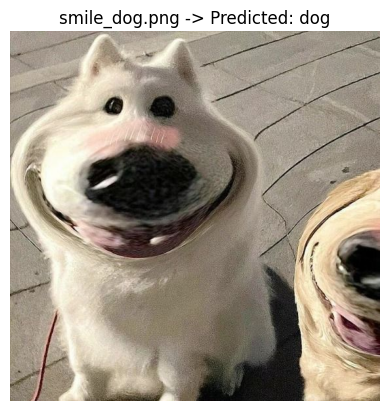

In [91]:
plt.imshow(image)
plt.title(f"{filename} -> Predicted: {label}")
plt.axis("off")
plt.show()